In [1]:
from dotenv import load_dotenv
load_dotenv("../.env")

# set the following parameter in .env to save to memory
# [database]
# DATABASE_URL=sqlite:///.db/temp_db.db

%set_env DATABASE_URL=sqlite:///:memory:


env: DATABASE_URL=sqlite:///:memory:


In [2]:
from hikarie_bot.__main__ import app, get_db
from hikarie_bot.models import Achievement, GuestArrivalInfo, UserBadge
from hikarie_bot.curd import insert_arrival_action, initially_insert_badge_data
from datetime import datetime


In [3]:
session = get_db().__next__()


In [4]:
session.query(GuestArrivalInfo).all()


[]

In [5]:
initially_insert_badge_data(session=session)


2024-12-24 08:30:08.405 | INFO     | hikarie_bot.curd:initially_insert_badge_data:297 - Badge data inserted successfully
2024-12-24 08:30:08.417 | INFO     | hikarie_bot.curd:initially_insert_badge_data:311 - Badge Type data inserted successfully
2024-12-24 08:30:08.436 | INFO     | hikarie_bot.curd:initially_insert_badge_data:313 - inserted successfully


In [6]:
now = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
now = datetime(2024, 12, 23)
now


datetime.datetime(2024, 12, 23, 0, 0)

In [7]:
from datetime import timedelta
import random
from collections import Counter

def randomly_generate_last_week_datetime(now:datetime | None=None):
    if now is None:
        now = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)

    # get Monday of last week
    ref_date = now - timedelta(days=7)
    if not now.weekday() == 0:
        ref_date -= timedelta(days=now.weekday())

    # now the ref_date is Monday of last week
    # randomly replace the time to Monday to Friday and also change the time from 6AM to 6PM
    return ref_date.replace(
        hour=random.randint(6, 18),
        minute=random.randint(0, 59),
        second=random.randint(0, 59),
    ) + timedelta(days=random.randint(0, 4))

c = Counter()
for i in range(100):
    random_date = randomly_generate_last_week_datetime(datetime(2024,12,23))
    c[random_date.replace(hour=0,minute=0,second=0,microsecond=0)] += 1

c


Counter({datetime.datetime(2024, 12, 17, 0, 0): 26,
         datetime.datetime(2024, 12, 20, 0, 0): 20,
         datetime.datetime(2024, 12, 16, 0, 0): 19,
         datetime.datetime(2024, 12, 18, 0, 0): 18,
         datetime.datetime(2024, 12, 19, 0, 0): 17})

In [8]:
user_names = {
    "nachi",
    "yuka",
    "seiya",
    "yuto",
    "kazuki",
    "sota",
    "yuki",
    "shota",
    "koki",
    "sho",
}


In [9]:
# randomly insert some data
import random
for i in range(100):
    user_name = random.choice(list(user_names))
    insert_arrival_action(
        session=session,
        user_id=user_name,
        jst_datetime=randomly_generate_last_week_datetime(),
    )


2024-12-24 08:30:08.534 | INFO     | hikarie_bot.curd:insert_arrival_action:190 - inserting action; date: 2024-12-19 06:37:22, user_id: koki
2024-12-24 08:30:08.541 | INFO     | hikarie_bot.curd:insert_arrival_action:196 - start of day: 2024-12-19 00:00:00, end of day: 2024-12-20 00:00:00
2024-12-24 08:30:08.549 | INFO     | hikarie_bot.curd:insert_arrival_action:219 - new arrival @ 2024-12-19 06:37:22 id: 1
2024-12-24 08:30:08.564 | INFO     | hikarie_bot.db_data.badges:__init__:60 - badge_type_to_check: [1, 2, 3, 4, 5, 6, 7, 8, 15]
2024-12-24 08:30:08.579 | INFO     | hikarie_bot.db_data.badges:check_straight_flash:332 - not enough arrivals: 1
2024-12-24 08:30:08.586 | INFO     | hikarie_bot.db_data.badges:check_lucky_you_guys:587 - arrived_minute_start: 2024-12-19 06:37:00
2024-12-24 08:30:08.587 | INFO     | hikarie_bot.db_data.badges:check_lucky_you_guys:588 - user_arrival.arrival_time: 2024-12-19 06:37:22
2024-12-24 08:30:08.594 | INFO     | hikarie_bot.db_data.badges:check_lucky

In [10]:
session.query(GuestArrivalInfo).all()


[<GuestArrivalInfo(user_id=koki, arrival_time=2024-12-19 06:37:22, arrival_rank=1, acquired_score_sum=11)>,
 <GuestArrivalInfo(user_id=sota, arrival_time=2024-12-18 13:10:02, arrival_rank=1, acquired_score_sum=7)>,
 <GuestArrivalInfo(user_id=sota, arrival_time=2024-12-19 16:39:19, arrival_rank=2, acquired_score_sum=3)>,
 <GuestArrivalInfo(user_id=shota, arrival_time=2024-12-20 16:33:18, arrival_rank=1, acquired_score_sum=7)>,
 <GuestArrivalInfo(user_id=sota, arrival_time=2024-12-16 17:35:15, arrival_rank=1, acquired_score_sum=7)>,
 <GuestArrivalInfo(user_id=yuto, arrival_time=2024-12-18 15:15:16, arrival_rank=2, acquired_score_sum=5)>,
 <GuestArrivalInfo(user_id=kazuki, arrival_time=2024-12-16 13:29:44, arrival_rank=1, acquired_score_sum=7)>,
 <GuestArrivalInfo(user_id=nachi, arrival_time=2024-12-16 16:45:02, arrival_rank=2, acquired_score_sum=5)>,
 <GuestArrivalInfo(user_id=nachi, arrival_time=2024-12-20 15:33:06, arrival_rank=1, acquired_score_sum=5)>,
 <GuestArrivalInfo(user_id=seiy

In [11]:
# 1週間前の日付を取得
from datetime import timedelta
from datetime import datetime

one_week_ago = now - timedelta(days=7)

# 1週間前の日付を取得
one_week_ago


datetime.datetime(2024, 12, 16, 0, 0)

In [12]:
last_week_arrivals = get_db().__next__().query(GuestArrivalInfo).filter(
    GuestArrivalInfo.arrival_time >= one_week_ago,
).all()


In [13]:
from matplotlib import pyplot as plt
from ing_theme_matplotlib import mpl_style
mpl_style(dark=True)


In [14]:
# 先週一週間の登録回数のグラフを作成

# 日付ごとの登録回数を取得
from collections import defaultdict
date_count = defaultdict(int)
for arrival in last_week_arrivals:
    date = arrival.arrival_time.strftime("%m/%d")
    date_count[date] += 1
date_count


defaultdict(int, {'12/19': 8, '12/18': 9, '12/20': 9, '12/16': 10, '12/17': 8})

/tmp/ipykernel_1942/1789554075.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


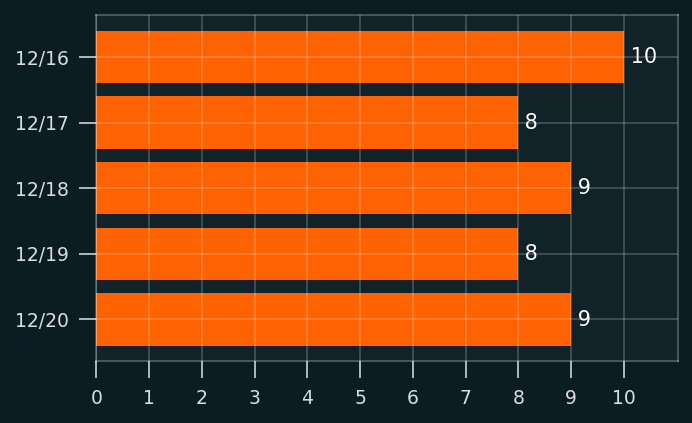

In [15]:
fig, ax = plt.subplots(figsize=(5, 3), dpi= 150)


keys, values = zip(*sorted(date_count.items(), key=lambda x: x[0], reverse=True))

ax.barh(keys,values)

for i, v in enumerate(values):
    # horizontal offset at the right side of the bar
    ax.text(v, i, f" {v}", color='white', va='center', ha="left", fontsize=10)

ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] * 1.05)

# y軸の補助目盛を非表示
ax.minorticks_off()
ax.yaxis.set_tick_params(which="major")
ax.set_xticks(range(0, max(values)+1))

fig.show()


(0.0, 48.510000000000005)

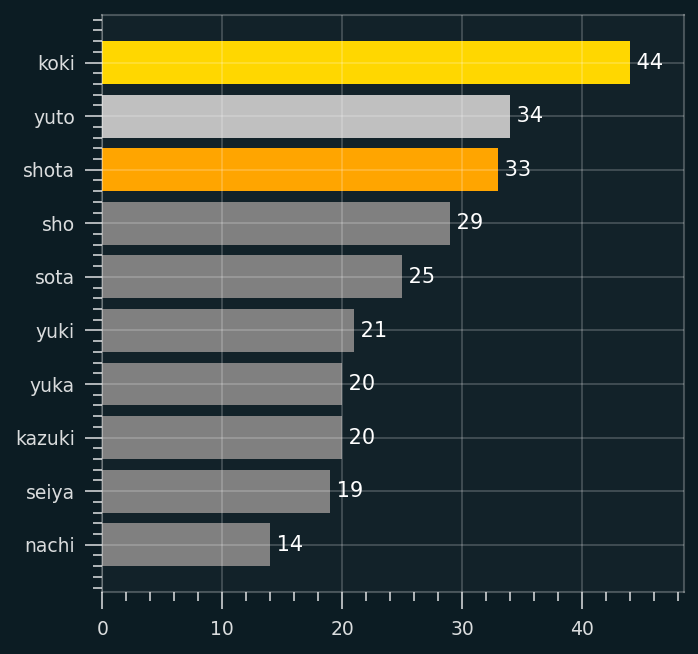

In [16]:
# plot the sum score achieved by each user
fig, ax = plt.subplots(figsize=(5, 5), dpi= 150)

user_score = defaultdict(int)
for arrival in last_week_arrivals:
    user_score[arrival.user_id] += arrival.acquired_score_sum

keys, values = zip(*sorted(user_score.items(), key=lambda x: x[1], reverse=False)[-10:])

colors = ['gray'] * len(keys)  # Bronze color for all
colors[-1] = 'gold'  # Gold color for the top user
if len(keys) > 1:
    colors[-2] = 'silver'  # Silver color for the second user
if len(keys) > 2:
    colors[-3] = 'orange'  # Bronze color for the third user

ax.barh(keys, values, color=colors)
for i, v in enumerate(values):
    # horizontal offset at the right side of the bar
    ax.text(v, i, f" {v}", color='white', va='center', ha="left", fontsize=10)

ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] * 1.05)



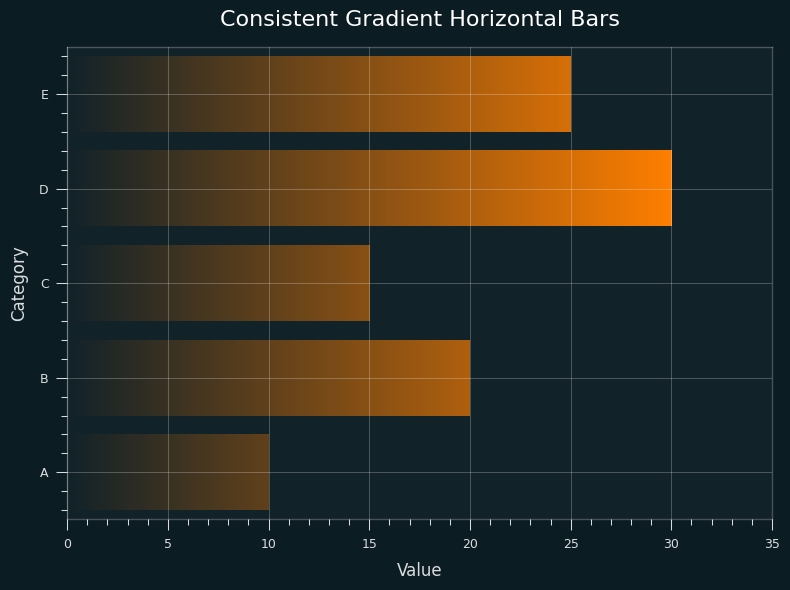

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Data
categories = ['A', 'B', 'C', 'D', 'E']
values = [10, 20, 15, 30, 25]

# Create a gradient colormap from transparent to orange
transparent_orange = LinearSegmentedColormap.from_list(
    'transparent_orange',
    [(1, 0.5, 0, 0), (1, 0.5, 0, 1)]  # RGBA: Transparent to Orange
)

# Function to create gradient horizontal bars
def gradient_barh(ax, y, x, height, cmap= LinearSegmentedColormap.from_list(
    'transparent_orange',
    [(1, 0.5, 0, 0), (1, 0.5, 0, 1)]  # RGBA: Transparent to Orange
) ):
    max_value = max(x)  # Calculate the maximum value internally
    for i, val in enumerate(x):
        ax.imshow(
            np.linspace(0, 1, 256).reshape(1, -1),  # Gradient data
            extent=(0, val, y[i] - height / 2, y[i] + height / 2),
            cmap=cmap,
            origin='lower',
            aspect='auto',
            alpha=val / max_value  # Scale transparency by the value
        )

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

y_positions = np.arange(len(categories))
bar_height = 0.8
gradient_barh(ax, y_positions, values, bar_height)

# Customize plot
ax.set_yticks(y_positions)
ax.set_yticklabels(categories)
ax.set_ylim(-0.5, len(categories) - 0.5)
ax.set_xlim(0, max(values) + 5)
ax.set_title("Consistent Gradient Horizontal Bars", fontsize=16)
ax.set_xlabel("Value")
ax.set_ylabel("Category")

# Show plot
plt.tight_layout()
plt.show()


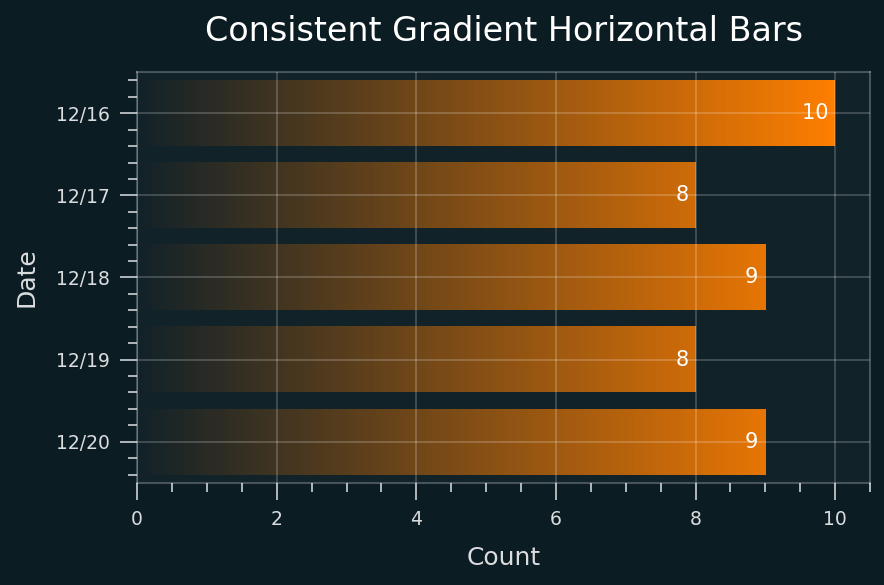

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np

categories, values = zip(*sorted(date_count.items(), key=lambda x: x[0], reverse=True))


# Plot with the updated gradient_barh function
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

y_positions = np.arange(len(categories))
bar_height = 0.8
gradient_barh(ax, y_positions, values, bar_height, transparent_orange)

for i, v in enumerate(values):
    ax.text(v, i, f"{v} ", color='white', va='center', ha="right", fontsize=10)

# Customize plot
ax.set_yticks(y_positions)
ax.set_yticklabels(categories)
ax.set_ylim(-0.5, len(categories) - 0.5)
ax.set_xlim(0, max(values)*1.05)
ax.set_title("Consistent Gradient Horizontal Bars", fontsize=16)
ax.set_xlabel("Count")
ax.set_ylabel("Date")

# Show plot
plt.tight_layout()
plt.show()

plt.savefig("test.pdf")
